In [1]:
import json
import statistics 
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline  

from sim import *

In [2]:
def media(file = './result/teste 1', tempo='total', prioridade=None):
    with open(file) as json_file:  
        data = json.load(json_file)

    totalTime0 = list()
    processTime0 = list()
    queueTime0 = list()

    totalTime1 = list()
    processTime1 = list()
    queueTime1 = list()
    
    queueLen = list()
    
    fogCount = dict()

    for t in data:
        tTime = t['times']['processEnd'] - t['times']['bornTime']
        pTime = t['times']['processEnd'] - t['times']['processStart']
        qTime = t['times']['processStart'] - t['times']['enqueueTime']
        qLen = t['times']['queueLength']
        queueLen.append(qLen)
        if t['priority'] == 0:
            totalTime0.append(tTime)
            processTime0.append(pTime)
            queueTime0.append(qTime)

        if t['priority'] == 1:
            totalTime1.append(tTime)
            processTime1.append(pTime)
            queueTime1.append(qTime)

        try:
            fogCount[t['info']['fog']] += 1
        except:
            fogCount[t['info']['fog']] = 1
    if prioridade==0:
        if tempo == 'total':
            return (sum(totalTime0)/len(totalTime0))*1000
        if tempo=='proc':
            return (sum(processTime0)/len(processTime0)*1000)
        if tempo=='queue':
            return sum(queueTime0)/len(queueTime0)*1000
        if tempo=='qLen':
            return (sum(queueLen)/len(queueLen))

    elif prioridade==1:
        if tempo == 'total':
            return (sum(totalTime1)/len(totalTime1))*1000
        if tempo=='proc':
            return (sum(processTime1)/len(processTime1)*1000)
        if tempo=='queue':
            return sum(queueTime1)/len(queueTime1)*1000
        if tempo=='qLen':
            return (sum(queueLen)/len(queueLen))

    else:
        if tempo == 'total':
            print([((sum(totalTime0)/len(totalTime0))*1000), (sum(totalTime1)/len(totalTime1))*1000])
            return [((sum(totalTime0)/len(totalTime0))*1000), (sum(totalTime1)/len(totalTime1))*1000]
        if tempo=='proc':
            return [(sum(processTime0)/len(processTime0)*1000), (sum(processTime1)/len(processTime1)*1000)]
        if tempo=='queue':
            return [(sum(queueTime1)/len(queueTime1)*1000), (sum(queueTime1)/len(queueTime1)*1000)]
        if tempo=='qLen':
            return [(sum(queueLen)/len(queueLen)),(sum(queueLen)/len(queueLen))]


In [3]:
!ls result/

'teste 1'   'teste 15'	'teste 20'  'teste 26'	'teste 31'  'teste 7'
'teste 10'  'teste 16'	'teste 21'  'teste 27'	'teste 32'  'teste 8'
'teste 11'  'teste 17'	'teste 22'  'teste 28'	'teste 33'  'teste 9'
'teste 12'  'teste 18'	'teste 23'  'teste 29'	'teste 4'
'teste 13'  'teste 19'	'teste 24'  'teste 3'	'teste 5'
'teste 14'  'teste 2'	'teste 25'  'teste 30'	'teste 6'


In [4]:
def plots(fog, tipo, log='False'):
    testes = list()
    with open('testes.csv', 'r') as csvFile:
        reader = csv.reader(csvFile)
        for row in reader:
            if(row[1]==fog):
                print(row)
                testes.append(row[0])
    csvFile.close()
    raw_data = {
            'requisicoes': ['100', '500', '1000'],
            'pre_score': [media(file = './result/teste '+testes[0], tempo=tipo, prioridade=0),\
                          media(file = './result/teste '+testes[3], tempo=tipo, prioridade=0),\
                          media(file = './result/teste '+testes[6], tempo=tipo, prioridade=0)],

            'mid_score': [media(file = './result/teste '+testes[1], tempo=tipo, prioridade=0),\
                          media(file = './result/teste '+testes[4], tempo=tipo, prioridade=0),\
                          media(file = './result/teste '+testes[7], tempo=tipo, prioridade=0)],
        
            'post_score': [media(file = './result/teste '+testes[2], tempo=tipo, prioridade=0),\
                           media(file = './result/teste '+testes[5], tempo=tipo, prioridade=0),\
                           media(file = './result/teste '+testes[8], tempo=tipo, prioridade=0)]}
        
    print(raw_data)
    df = pd.DataFrame(raw_data, columns = ['requisicoes', 'pre_score', 'mid_score', 'post_score'])

    # Setting the positions and width for the bars
    pos = list(range(len(df['pre_score']))) 
    width = 0.25 

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data,
    # in position pos,
    plt.bar(pos, 
            #using df['pre_score'] data,
            df['pre_score'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#EE3224', 
            hatch="//",
            # log=log,
            # with label the first value in first_name
            label=df['requisicoes'][0]) 


    # Create a bar with mid_score data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
            #using df['mid_score'] data,
            df['mid_score'],
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#F78F1E', 
            hatch="--",
            # log=log,
            # with label the second value in first_name
            label=df['requisicoes'][1]) 

    # Create a bar with post_score data,
    # in position pos + some width buffer,
    plt.bar([p + width*2 for p in pos], 
            #using df['post_score'] data,
            df['post_score'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#FFC222',
            hatch="..",
            # log=log,
            # with label the third value in first_name
            label=df['requisicoes'][2]) 

    raw_data = {
            'requisicoes': ['100', '500', '1000'],
            'pre_score': [media(file = './result/teste '+testes[0], tempo=tipo, prioridade=1),\
                          media(file = './result/teste '+testes[3], tempo=tipo, prioridade=1),\
                          media(file = './result/teste '+testes[6], tempo=tipo, prioridade=1)],

            'mid_score': [media(file = './result/teste '+testes[1], tempo=tipo, prioridade=1),\
                          media(file = './result/teste '+testes[4], tempo=tipo, prioridade=1),\
                          media(file = './result/teste '+testes[7], tempo=tipo, prioridade=1)],

            
            'post_score': [media(file = './result/teste '+testes[2], tempo=tipo, prioridade=1),\
                          media(file = './result/teste '+testes[5], tempo=tipo, prioridade=1),\
                          media(file = './result/teste '+testes[8], tempo=tipo, prioridade=1)]}

    print(raw_data)
    df = pd.DataFrame(raw_data, columns = ['requisicoes', 'pre_score', 'mid_score', 'post_score'])

    plt.bar(pos, 
            #using df['pre_score'] data,
            df['pre_score'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#EE3224', 
            hatch="//",
            # log=log,
            # with label the first value in first_name
            label=df['requisicoes'][0]) 


    # Create a bar with mid_score data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
            #using df['mid_score'] data,
            df['mid_score'],
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#F78F1E', 
            hatch="--",
            # log=log,
            # with label the second value in first_name
            label=df['requisicoes'][1]) 

    # Create a bar with post_score data,
    # in position pos + some width buffer,
    plt.bar([p + width*2 for p in pos], 
            #using df['post_score'] data,
            df['post_score'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#FFC222',
            hatch="..",
            # log='True',
            # with label the third value in first_name
            label=df['requisicoes'][2]) 

    # Set the y axis label
    ax.set_ylabel('Tempo')

    # Set the x axis label
    ax.set_xlabel('Numero de Requisições')

    # Set the chart's title
    # ax.set_title('Test Subject Scores')

    # Set the position of the x ticks
    ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(df['requisicoes'])

    # Setting the x-axis and y-axis limits
    # plt.xlim(min(pos)-width, max(pos)+width*4)
    # plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

    # Adding the legend and showing the plot
    plt.legend(['Soft Task', 'Medium Task', 'Hard Task'], loc='upper left')
    plt.grid()
    plt.show()

In [5]:
plots('small', 'total')

['4', 'small', 'soft', '100']
['5', 'small', 'medium', '100']
['6', 'small', 'hard', '100']
['7', 'small', 'soft', '500']
['8', 'small', 'medium', '500']
['9', 'small', 'hard', '500']
['10', 'small', 'soft', '1000']
['11', 'small', 'medium', '1000']
['12', 'small', 'hard', '1000']


JSONDecodeError: Extra data: line 22 column 2 (char 474)

['13', 'medium', 'soft', '100']
['14', 'medium', 'medium', '100']
['15', 'medium', 'hard', '100']
['16', 'medium', 'soft', '500']
['17', 'medium', 'medium', '500']
['18', 'medium', 'hard', '500']
['19', 'medium', 'soft', '1000']
['20', 'medium', 'medium', '1000']
['21', 'medium', 'hard', '1000']
{'requisicoes': ['100', '500', '1000'], 'pre_score': [50.761471854315865, 50.67481216059791, 46.926427676942616], 'mid_score': [28.15367110570272, 31.00626107586755, 28.599927133984036], 'post_score': [41.89960543314616, 46.92557806968689, 37.33634113205804]}
{'requisicoes': ['100', '500', '1000'], 'pre_score': [61.521396504508125, 62.58841651545631, 49.164619774288596], 'mid_score': [28.61790445115831, 78.14072409205966, 29.63393183814155], 'post_score': [56.36171595255534, 731.6916249010297, 40.53405419455634]}


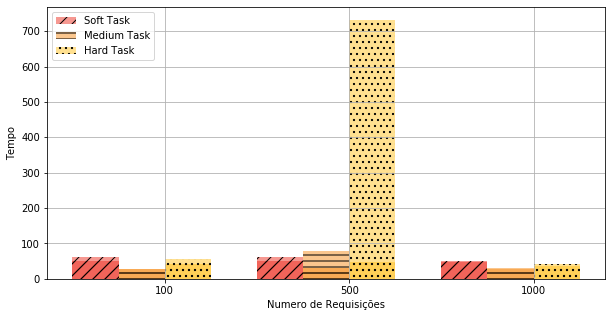

In [7]:
plots('medium', 'total')

['22', 'large', 'soft', '100']
['23', 'large', 'medium', '100']
['24', 'large', 'hard', '100']
['25', 'large', 'soft', '500']
['26', 'large', 'medium', '500']
['27', 'large', 'hard', '500']
['28', 'large', 'soft', '1000']
['29', 'large', 'medium', '1000']
['30', 'large', 'hard', '1000']
{'requisicoes': ['100', '500', '1000'], 'pre_score': [25.930095142788357, 30.67778464688195, 31.851288286844888], 'mid_score': [42.5592090818617, 51.663959855503506, 52.71884138849047], 'post_score': [32.103030867046776, 36.5508735815684, 36.60042657852173]}
{'requisicoes': ['100', '500', '1000'], 'pre_score': [26.77009156015184, 4637.968925213814, 42.70078185399374], 'mid_score': [43.88319354587131, 78.40125830173493, 100.64794243176777], 'post_score': [32.48145161734687, 50.94998503261142, 49.94766614702013]}


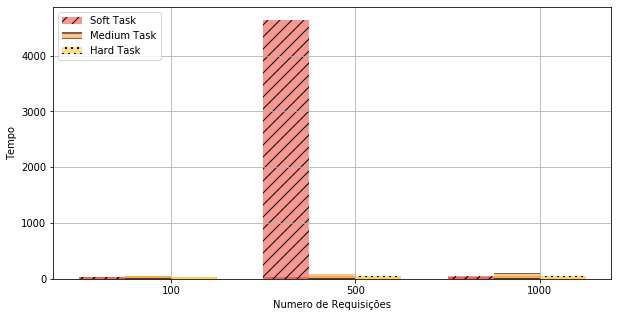

In [8]:
plots('large', 'total')

In [9]:
plots('small', 'queue')

['4', 'small', 'soft', '100']
['5', 'small', 'medium', '100']
['6', 'small', 'hard', '100']
['7', 'small', 'soft', '500']
['8', 'small', 'medium', '500']
['9', 'small', 'hard', '500']
['10', 'small', 'soft', '1000']
['11', 'small', 'medium', '1000']
['12', 'small', 'hard', '1000']


JSONDecodeError: Extra data: line 22 column 2 (char 474)

['13', 'medium', 'soft', '100']
['14', 'medium', 'medium', '100']
['15', 'medium', 'hard', '100']
['16', 'medium', 'soft', '500']
['17', 'medium', 'medium', '500']
['18', 'medium', 'hard', '500']
['19', 'medium', 'soft', '1000']
['20', 'medium', 'medium', '1000']
['21', 'medium', 'hard', '1000']
{'requisicoes': ['100', '500', '1000'], 'pre_score': [3.6104771826002335, 3.851048392719693, 0.9991458257039387], 'mid_score': [0.4519770410325792, 2.3450882196426392, 0.7703532324896919], 'post_score': [1.676504373550415, 5.62474160724216, 1.0067567613389756]}
{'requisicoes': ['100', '500', '1000'], 'pre_score': [12.375857830047607, 14.178479115168255, 2.5413896560668947], 'mid_score': [0.7795023653242323, 48.06074627770318, 1.5871206866370307], 'post_score': [15.258891820907593, 688.4895048909717, 4.034815576341417]}


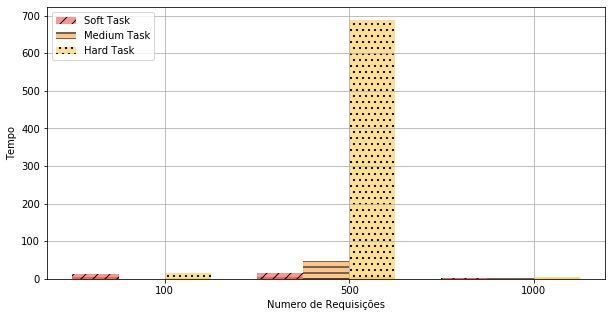

In [10]:
plots('medium', 'queue')

['22', 'large', 'soft', '100']
['23', 'large', 'medium', '100']
['24', 'large', 'hard', '100']
['25', 'large', 'soft', '500']
['26', 'large', 'medium', '500']
['27', 'large', 'hard', '500']
['28', 'large', 'soft', '1000']
['29', 'large', 'medium', '1000']
['30', 'large', 'hard', '1000']
{'requisicoes': ['100', '500', '1000'], 'pre_score': [0.7233577304416233, 4.511629056930542, 4.6002853393554695], 'mid_score': [1.0201921198103163, 6.429323787159389, 8.206504530376858], 'post_score': [0.8508608341217041, 4.745091880692375, 4.745913404888577]}
{'requisicoes': ['100', '500', '1000'], 'pre_score': [1.5256543424394395, 4610.852917636766, 14.936302497651841], 'mid_score': [2.2552287578582764, 28.223013997077942, 50.56006960339016], 'post_score': [1.4539754125807018, 17.207521544562447, 16.1962459564209]}


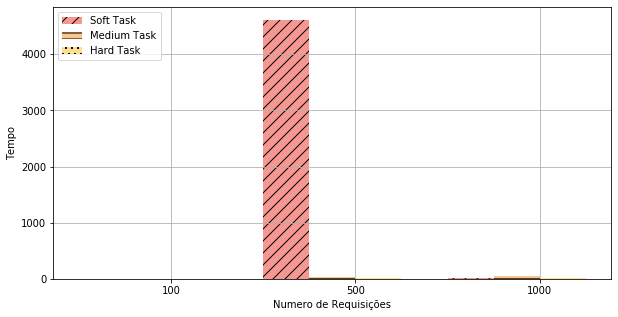

In [11]:
plots('large', 'queue')

In [ ]:
plots('small', 'qLen')

['13', 'medium', 'soft', '100']
['14', 'medium', 'medium', '100']
['15', 'medium', 'hard', '100']
['16', 'medium', 'soft', '500']
['17', 'medium', 'medium', '500']
['18', 'medium', 'hard', '500']
['19', 'medium', 'soft', '1000']
['20', 'medium', 'medium', '1000']
['21', 'medium', 'hard', '1000']
{'requisicoes': ['100', '500', '1000'], 'pre_score': [7.9174444444444445, 8.929155555555555, 2.4544888888888887], 'mid_score': [1.4592222222222222, 23.255761111111113, 1.839911111111111], 'post_score': [8.639777777777777, 306.98421666666667, 3.0493888888888887]}
{'requisicoes': ['100', '500', '1000'], 'pre_score': [7.9174444444444445, 8.929155555555555, 2.4544888888888887], 'mid_score': [1.4592222222222222, 23.255761111111113, 1.839911111111111], 'post_score': [8.639777777777777, 306.98421666666667, 3.0493888888888887]}


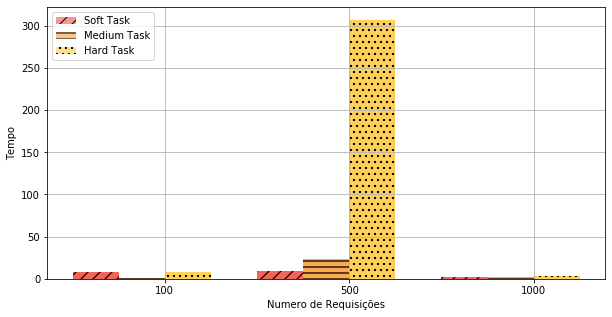

In [12]:
plots('medium', 'qLen')

['22', 'large', 'soft', '100']
['23', 'large', 'medium', '100']
['24', 'large', 'hard', '100']
['25', 'large', 'soft', '500']
['26', 'large', 'medium', '500']
['27', 'large', 'hard', '500']
['28', 'large', 'soft', '1000']
['29', 'large', 'medium', '1000']
['30', 'large', 'hard', '1000']
{'requisicoes': ['100', '500', '1000'], 'pre_score': [1.8243888888888888, 1886.3403722222222, 9.049911111111111], 'mid_score': [2.238611111111111, 15.725677777777777, 26.526866666666667], 'post_score': [1.7979444444444443, 10.10438888888889, 9.709833333333334]}
{'requisicoes': ['100', '500', '1000'], 'pre_score': [1.8243888888888888, 1886.3403722222222, 9.049911111111111], 'mid_score': [2.238611111111111, 15.725677777777777, 26.526866666666667], 'post_score': [1.7979444444444443, 10.10438888888889, 9.709833333333334]}


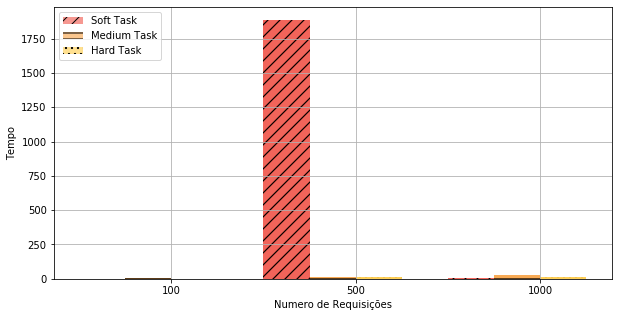

In [13]:
plots('large', 'qLen')